# Comparing to Xu, Dvorkin & Chael's [arXiv:1802.06788](https://arxiv.org/abs/1802.06788)

In [1]:
# import classy module
from classy import Class

# to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from numpy import log, log10, sqrt

from math import pi

from scipy.interpolate import interp1d

In [2]:
%config InlineBackend.figure_format = "retina"
matplotlib.rcParams['figure.figsize'] = (13,8)

In [3]:
base={'omega_b':0.02225,'ln10^{10}A_s':3.094,'n_s':0.9645,'YHe':'BBN','N_eff':3.046,'output':'tCl,pCl,lCl,mPk','lensing':'yes','k_output_values':'0.001,0.01,0.1,1.','P_k_max_h/Mpc':3.,'gauge':'synchronous'}

# h or tau_s
base.update({'h':0.6727})
# base.update({'100*theta_s':1.042143})

# tau_reio or z_reio
base.update({'tau_reio':0.0790})
# base.update({'z_reio':10.})

lcdm={'omega_cdm':0.1198}
idm={'omega_chi':0.1198,'omega_cdm':1.e-30,'sigmav_fo':1.e-26,'Vrms2':1.e-8}

flags={
       'baryon_mass':'hydrogen',
       'realistic Tx':'no',
       'is Tb blind to Tx':'yes',
#        'early blind Tb':'yes',
       'tight chi-baryon ic':'no',# if 'yes', low multipoles in EE spectra change
#        'tight chi-baryon ic':'yes',# if 'yes', low multipoles in EE spectra change
       'is theta_b blind to theta_x':'no',
       'ignore helium':'yes',
       'photoionization with Tg':'yes'
        }

ppr={'refine':5000,
     'Rx_H_ratio':100.,
     'dmde_buffer':20.,
     'z_dmde_max':2.e7,
     'reio_integrator':'stiff',
     'tol_dmde_integration':1.e-5,
     'start_small_k_at_tau_c_over_tau_h':1.e-4
    }

verbose={'background_verbose':3,'thermodynamics_verbose':5,'perturbations_verbose':1}

n2={'pow_n':2.,'sigma_0':4.9e-21,'mx':1000.}
n0={'pow_n':0.,'sigma_0':1.2e-26,'mx':1000.}
nm1={'pow_n':-1.,'sigma_0':3.6e-30,'mx':1000.}
nm2={'pow_n':-2.,'sigma_0':1.7e-33,'mx':1000.}
nm4={'pow_n':-4.,'sigma_0':1.6e-41,'mx':1000.}

In [4]:
# create LCDM instance of the class "Class"
LCDM = Class()
LCDM.set(base)
LCDM.set(verbose)
LCDM.set(lcdm)
LCDM.set({'photoionization with Tg':'yes'})
LCDM.set({'start_small_k_at_tau_c_over_tau_h':1.e-4})

LCDM.compute()# create instance of the class "Class"

LCDMor = Class()
LCDMor.set(base)
LCDMor.set(verbose)
LCDMor.set(lcdm)
LCDMor.set({'photoionization with Tg':'no'})
LCDMor.compute()# create instance of the class "Class"

In [5]:
IDM2 = Class()
IDM2.set(base)
IDM2.set(idm)
IDM2.set(ppr)
IDM2.set(verbose)
IDM2.set(flags)
IDM2.set(n2)
IDM2.compute()

IDM0 = Class()
IDM0.set(base)
IDM0.set(idm)
IDM0.set(ppr)
IDM0.set(verbose)
IDM0.set(flags)
IDM0.set(n0)
IDM0.compute()

IDMm1 = Class()
IDMm1.set(base)
IDMm1.set(idm)
IDMm1.set(ppr)
IDMm1.set(verbose)
IDMm1.set(flags)
IDMm1.set(nm1)
IDMm1.compute()

IDMm2 = Class()
IDMm2.set(base)
IDMm2.set(idm)
IDMm2.set(ppr)
IDMm2.set(verbose)
IDMm2.set(flags)
IDMm2.set(nm2)
IDMm2.compute()

IDMm4 = Class()
IDMm4.set(base)
IDMm4.set(idm)
IDMm4.set(ppr)
IDMm4.set(verbose)
IDMm4.set(flags)
IDMm4.set(nm4)
IDMm4.compute()

In [6]:
lcbg = LCDM.get_background()
lcbg.viewkeys()

dict_keys(['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', '(.)p_tot', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'V_rms^2', 'ang.diam.dist.', 'proper time [Gyr]', '(.)rho_tot', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur', '(.)p_tot_prime'])

In [27]:
lcth = LCDM.get_thermodynamics()
lcthor = LCDMor.get_thermodynamics()

ith2 = IDM2.get_thermodynamics()
ith0 = IDM0.get_thermodynamics()
ithm1 = IDMm1.get_thermodynamics()
ithm2 = IDMm2.get_thermodynamics()
ithm4 = IDMm4.get_thermodynamics()
ith0.viewkeys()

dict_keys(['R_x', 'dRx', 'x_e', 'R_x^prime', 'g [Mpc^-1]', 'conf. time [Mpc]', "kappa' [Mpc^-1]", 'tau_d', 'Tb [K]', 'c_b^2', 'w_b', 'Tx [K]', 'exp(-kappa)', 'c_x^2', 'z'])

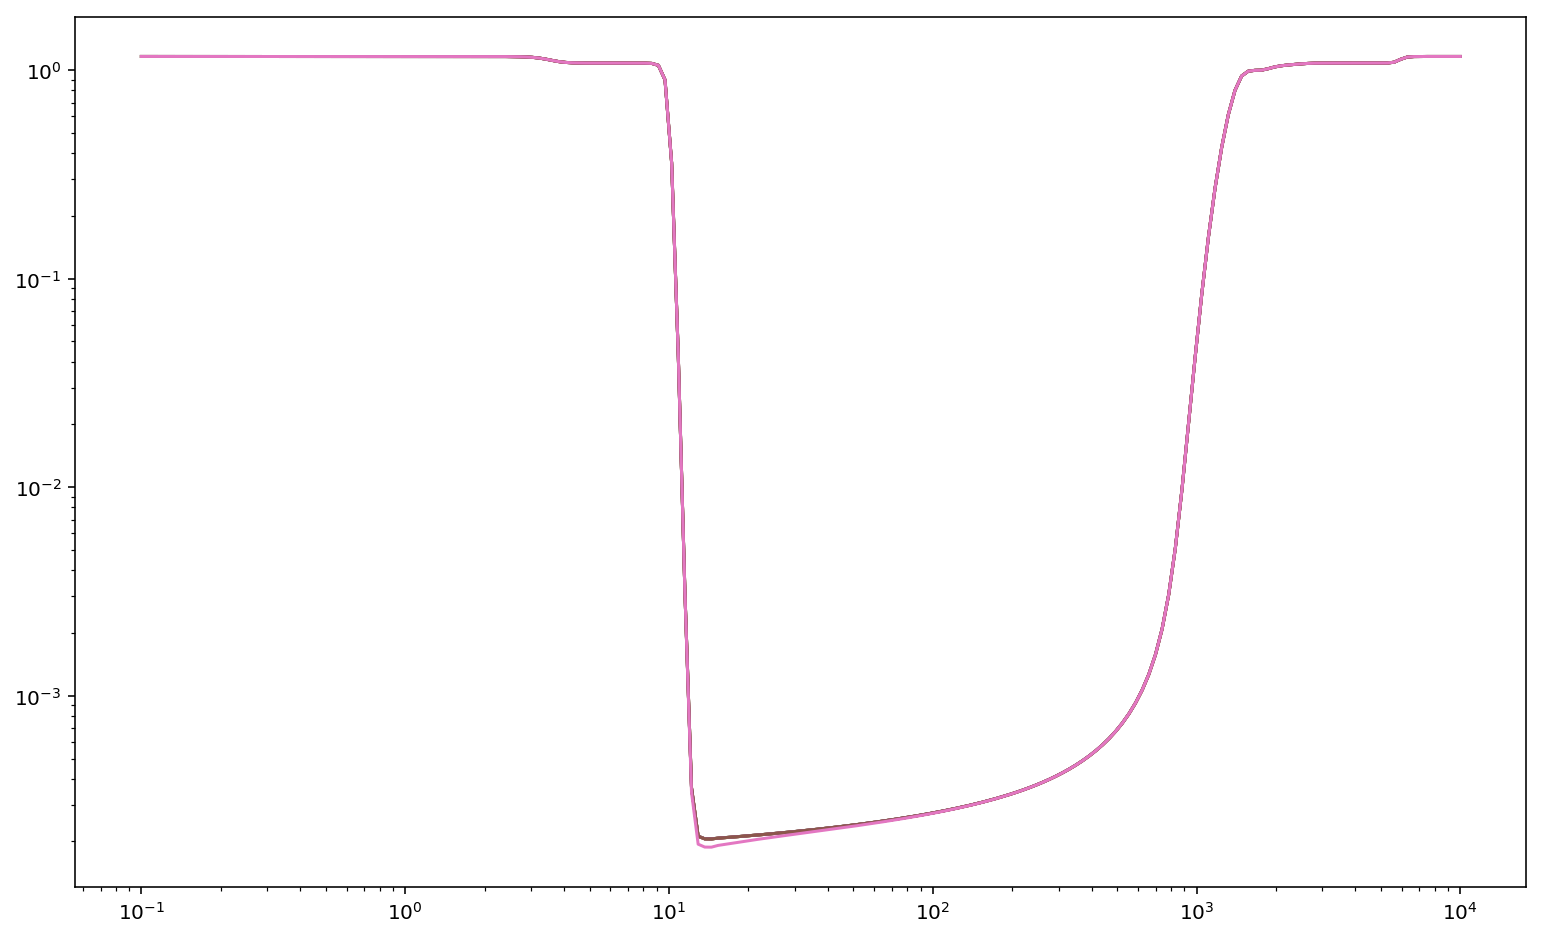

In [28]:
z_arr = np.logspace(-1, 4., 200)
lxe = np.array([ LCDM.ionization_fraction(z) for z in z_arr])
loxe = np.array([ LCDMor.ionization_fraction(z) for z in z_arr])
i2xe = np.array([ IDM2.ionization_fraction(z) for z in z_arr])
i0xe = np.array([ IDM0.ionization_fraction(z) for z in z_arr])
im1xe = np.array([ IDMm1.ionization_fraction(z) for z in z_arr])
im2xe = np.array([ IDMm2.ionization_fraction(z) for z in z_arr])
im4xe = np.array([ IDMm4.ionization_fraction(z) for z in z_arr])

plt.loglog(z_arr, lxe)
plt.loglog(z_arr, loxe)
plt.loglog(z_arr, i2xe)
plt.loglog(z_arr, i0xe)
plt.loglog(z_arr, im1xe)
plt.loglog(z_arr, im2xe)
plt.loglog(z_arr, im4xe)

# # Ratios:
# plt.semilogx(z_arr, lxe/lxe)

# # numerator different because it is the original: it (wrongly) uses Tmat instead of Trad for the photoionization coefficient
# plt.semilogx(z_arr, loxe/lxe)

# # numerators different because they use stiff integrator instead of Runge-Kutta
# # plt.semilogx(z_arr, i2xe/lxe)
# plt.semilogx(z_arr, i0xe/lxe)
# # plt.semilogx(z_arr, im1xe/lxe)
# # plt.semilogx(z_arr, im2xe/lxe)
# # plt.semilogx(z_arr, im4xe/lxe)

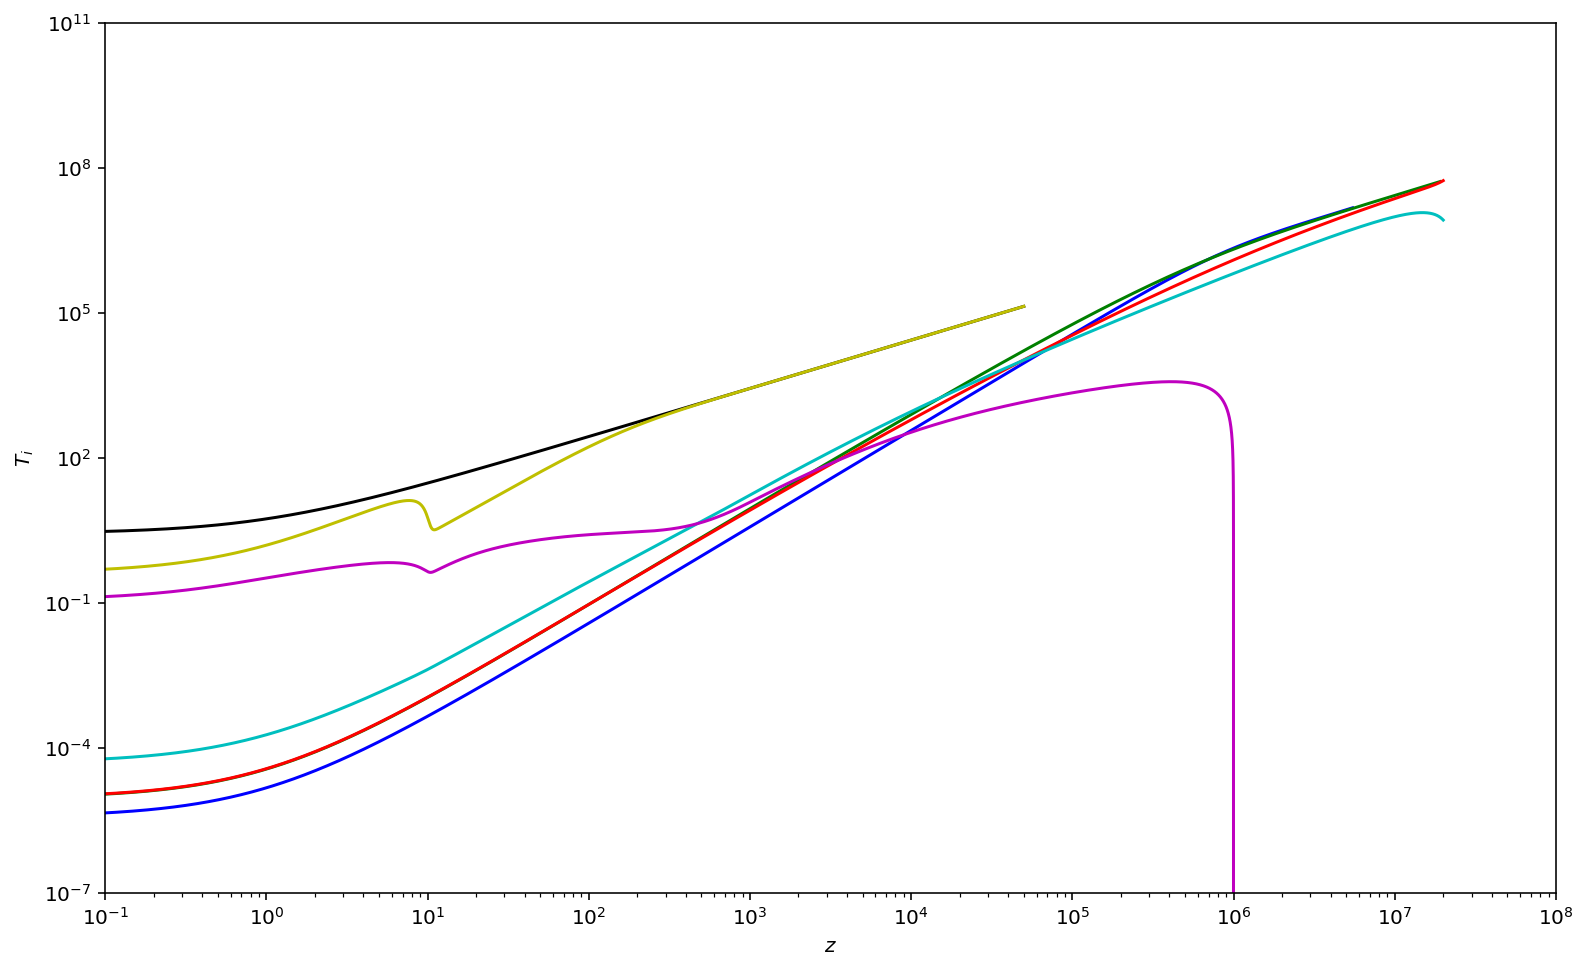

In [29]:
plt.figure(3)
plt.xscale('log');plt.yscale('log');plt.xlim(0.1,1.e8);plt.ylim(1.e-7,1.e11)
plt.xlabel(r'$z$')
plt.ylabel(r'$T_i$')
plt.plot(lcth['z'],(1.+lcth['z'])*2.7255,'k-')
plt.plot(lcth['z'],lcth['Tb [K]'],'y-')
plt.plot(ith2['z'],ith2['Tx [K]'],'b-')
plt.plot(ith0['z'],ith0['Tx [K]'],'g-')
# plt.plot(ith0['z'],ith0['Tb [K]'],'b-')
plt.plot(ithm1['z'],ithm1['Tx [K]'],'r-')
plt.plot(ithm2['z'],ithm2['Tx [K]'],'c-')
plt.plot(ithm4['z'],ithm4['Tx [K]'],'m-')

plt.show()

In [11]:
LRx = interp1d(log10(ith0['z'][1:]), log10(ith0['R_x'][1:]), fill_value='extrapolate')
LRxprime = interp1d(log10(ith0['z'][1:]), log10(ith0['R_x^prime'][1:]), fill_value='extrapolate')

zs = np.logspace(-1, 8, 300)
Lzs = log10(zs)

Hs = np.array([LCDM.Hubble(z) for z in zs])
Hz = interp1d(zs, Hs, fill_value='extrapolate')
del Hs

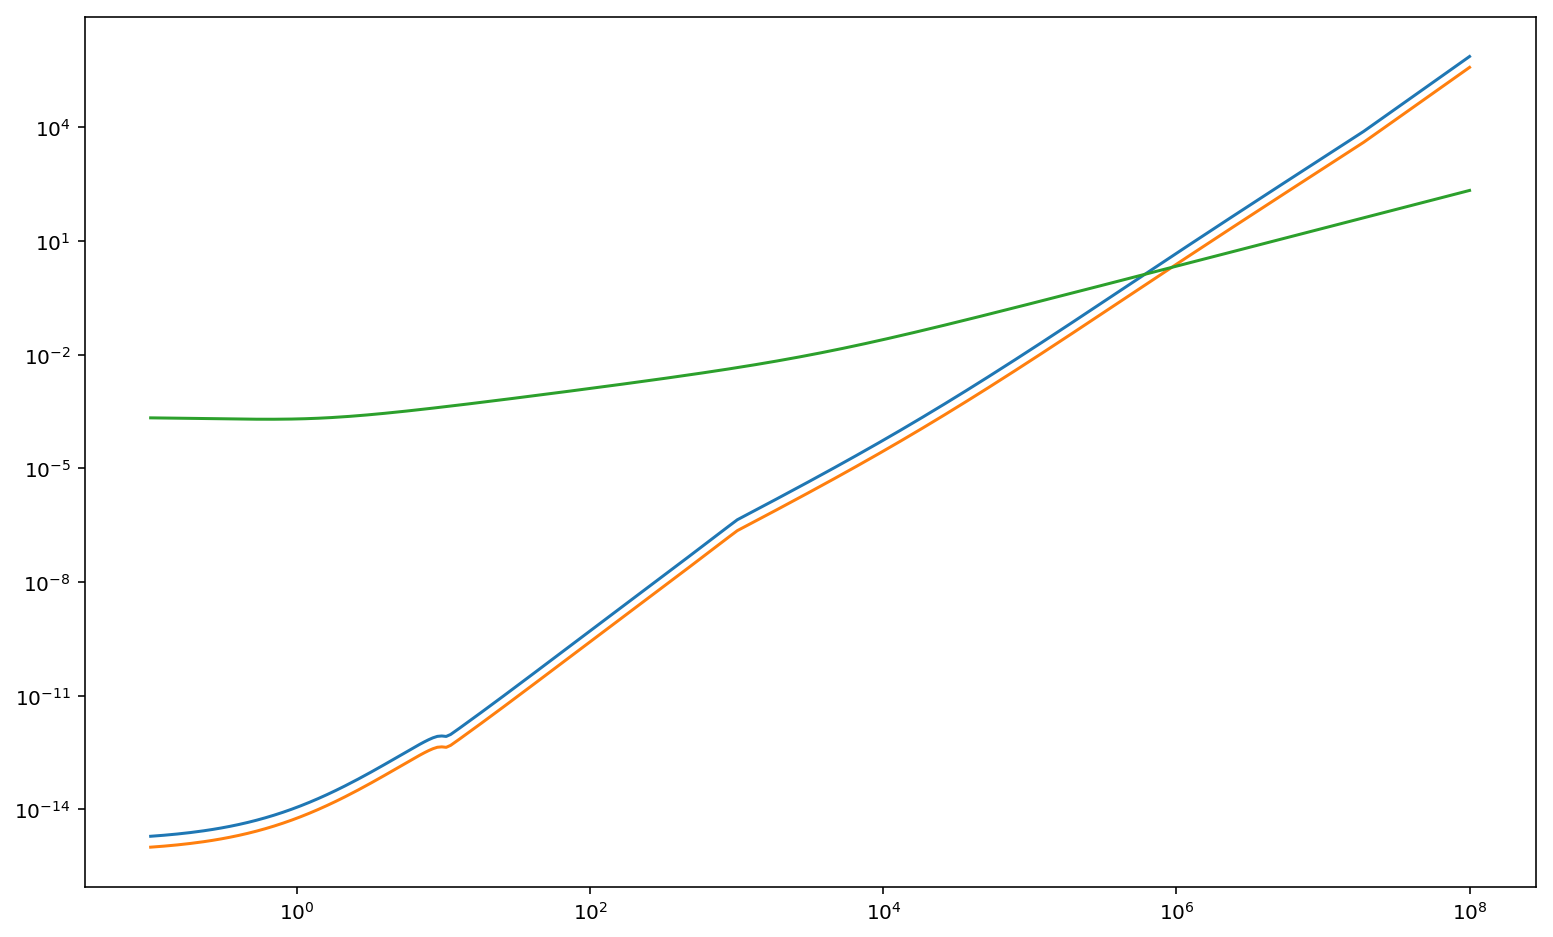

In [12]:
plt.figure(100)

plt.loglog(zs, 10**LRx(Lzs))
plt.loglog(zs, 10**LRxprime(Lzs))
plt.loglog(zs, Hz(zs)/(1.+zs))

In [21]:
knum = 3

lcpt = LCDM.get_perturbations()['scalar'][knum]
ipt2 = IDM2.get_perturbations()['scalar'][knum]
ipt0 = IDM0.get_perturbations()['scalar'][knum]
iptm1 = IDMm1.get_perturbations()['scalar'][knum]
iptm2 = IDMm2.get_perturbations()['scalar'][knum]
iptm4 = IDMm4.get_perturbations()['scalar'][knum]
ipt0.viewkeys()

dict_keys(['a', 'theta_g', 'phi', 'pol0_g', 'theta_b', 'theta_chi', 'theta_ur', 'shear_ur', 'shear_g', 'tau [Mpc]', 'delta_chi', 'theta_cdm', 'delta_ur', 'psi', 'pol2_g', 'delta_g', 'delta_cdm', 'pol1_g', 'delta_b'])

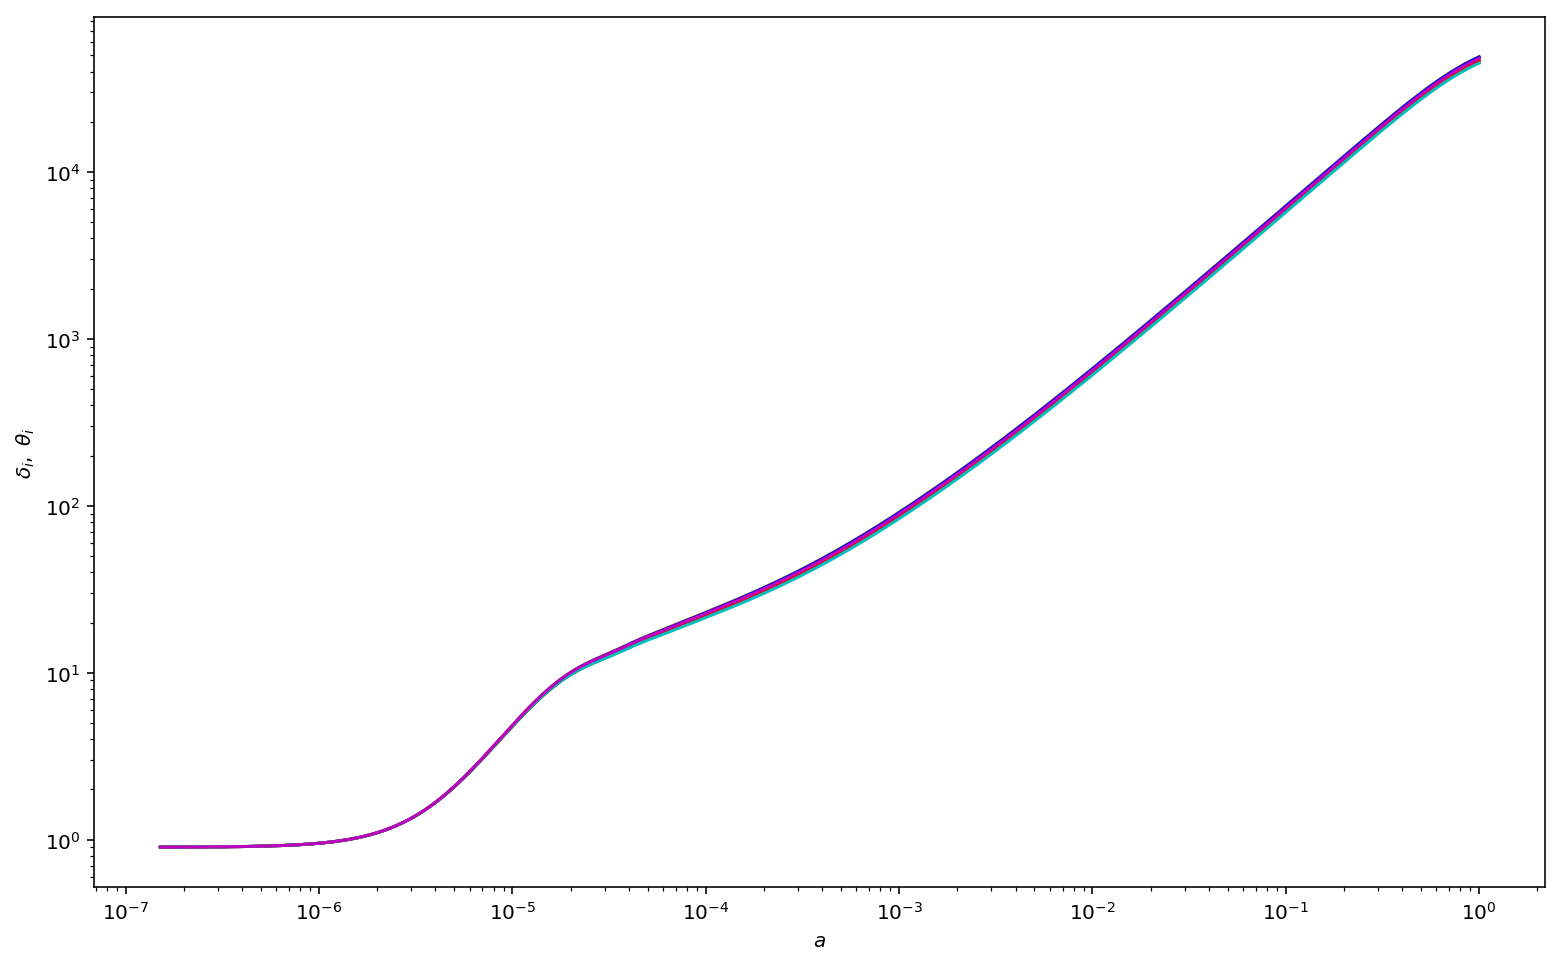

In [22]:
plt.figure(4)
plt.xscale('log');plt.yscale('log')#;plt.xlim(1.e-7,1.);plt.ylim(1.e-5,0.3)
plt.xlabel(r'$a$')
plt.ylabel(r'$\delta_i,\ \theta_i$')
#plt.plot(al,abs(lcpt['delta_cdm']),'k-')
#plt.plot(al,abs(lcpt['theta_cdm']),'k--')
#plt.plot(al,abs(lcpt['delta_b']),'g-')
#plt.plot(al,abs(lcpt['theta_b']),'g--')
plt.plot(lcpt['a'],abs(lcpt['delta_cdm']),'y-')
plt.plot(ipt2['a'],abs(ipt2['delta_chi']),'b-')
plt.plot(ipt0['a'],abs(ipt0['delta_chi']),'g-')
plt.plot(iptm1['a'],abs(iptm1['delta_chi']),'r-')
plt.plot(iptm2['a'],abs(iptm2['delta_chi']),'c-')
plt.plot(iptm4['a'],abs(iptm4['delta_chi']),'m-')
plt.show()

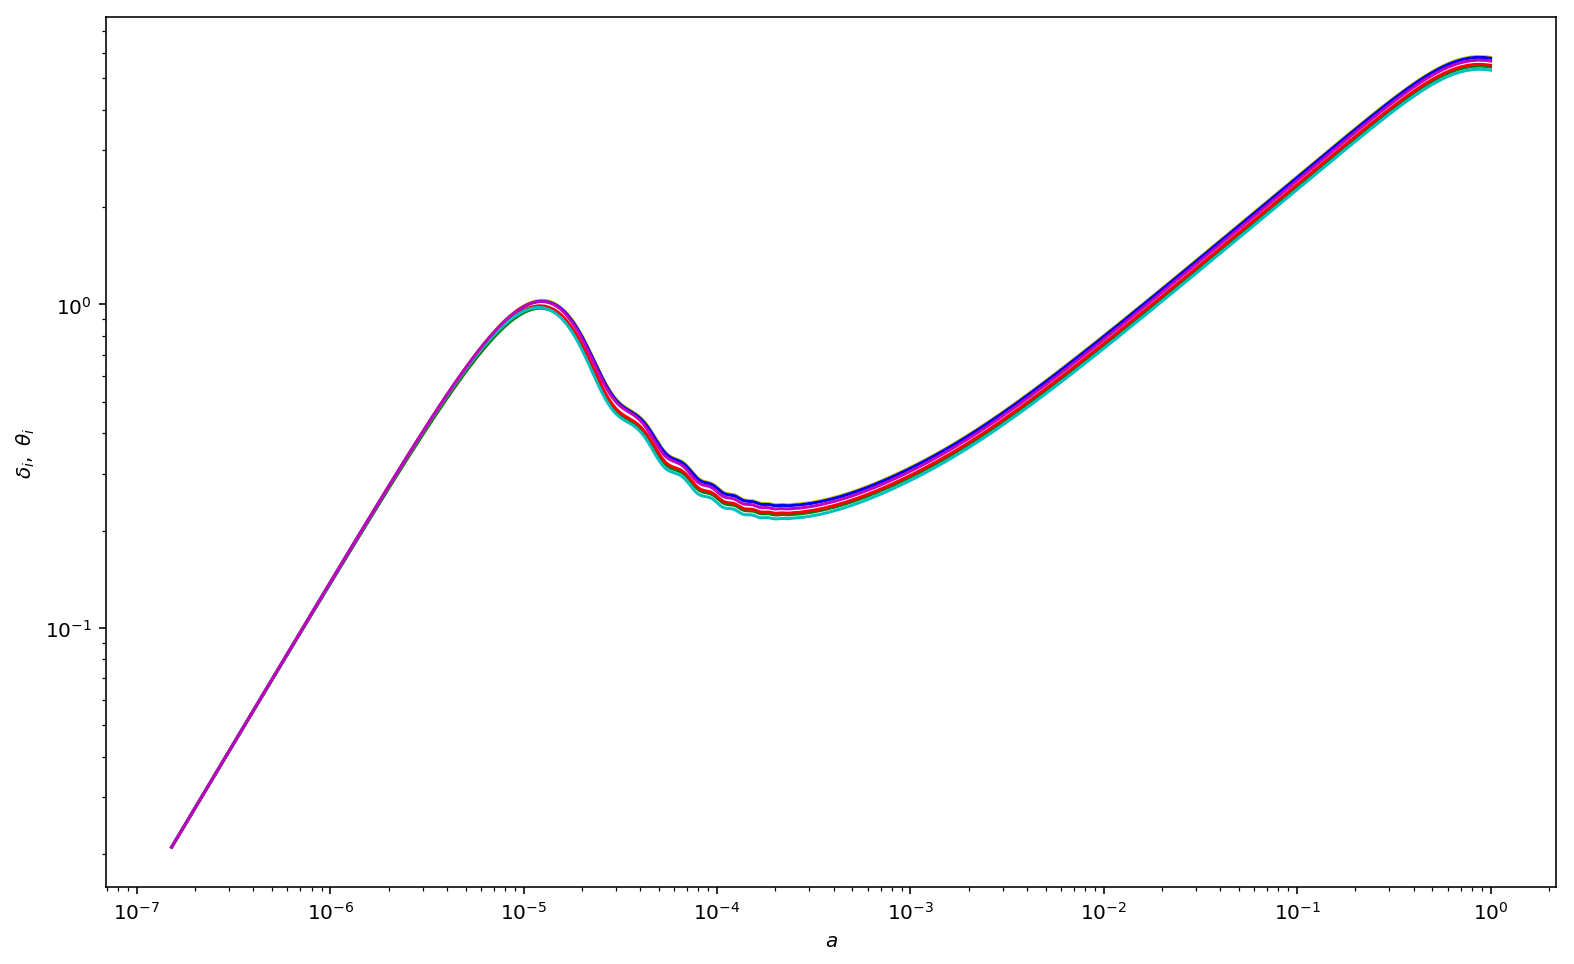

In [23]:
plt.figure(5)
plt.xscale('log');plt.yscale('log')#;plt.xlim(1.e-7,1.);plt.ylim(1.e-5,0.3)
plt.xlabel(r'$a$')
plt.ylabel(r'$\delta_i,\ \theta_i$')
#plt.plot(al,abs(lcpt['delta_cdm']),'k-')
#plt.plot(al,abs(lcpt['theta_cdm']),'k--')
#plt.plot(al,abs(lcpt['delta_b']),'g-')
# plt.plot(lcpt['a'],abs(lcpt['theta_b']),'g--')
plt.plot(lcpt['a'],abs(lcpt['theta_cdm']),'y-')
plt.plot(ipt2['a'],abs(ipt2['theta_chi']),'b-')
plt.plot(ipt0['a'],abs(ipt0['theta_chi']),'g-')
plt.plot(iptm1['a'],abs(iptm1['theta_chi']),'r-')
plt.plot(iptm2['a'],abs(iptm2['theta_chi']),'c-')
plt.plot(iptm4['a'],abs(iptm4['theta_chi']),'m-')

plt.show()

In [7]:
cls = LCDM.raw_cl(2500)
cls.viewkeys()

dict_keys(['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te'])

In [8]:
ll = cls['ell'][2:]
TT = cls['tt'][2:]
EE = cls['ee'][2:]

clsor = LCDMor.raw_cl(2500)
TTor = clsor['tt'][2:]
EEor = clsor['ee'][2:]

In [9]:
cls2 = IDM2.raw_cl(2500)
TT2 = cls2['tt'][2:]
EE2 = cls2['ee'][2:]

cls0 = IDM0.raw_cl(2500)
TT0 = cls0['tt'][2:]
EE0 = cls0['ee'][2:]

clsm1 = IDMm1.raw_cl(2500)
TTm1 = clsm1['tt'][2:]
EEm1 = clsm1['ee'][2:]

clsm2 = IDMm2.raw_cl(2500)
TTm2 = clsm2['tt'][2:]
EEm2 = clsm2['ee'][2:]

clsm4 = IDMm4.raw_cl(2500)
TTm4 = clsm4['tt'][2:]
EEm4 = clsm4['ee'][2:]

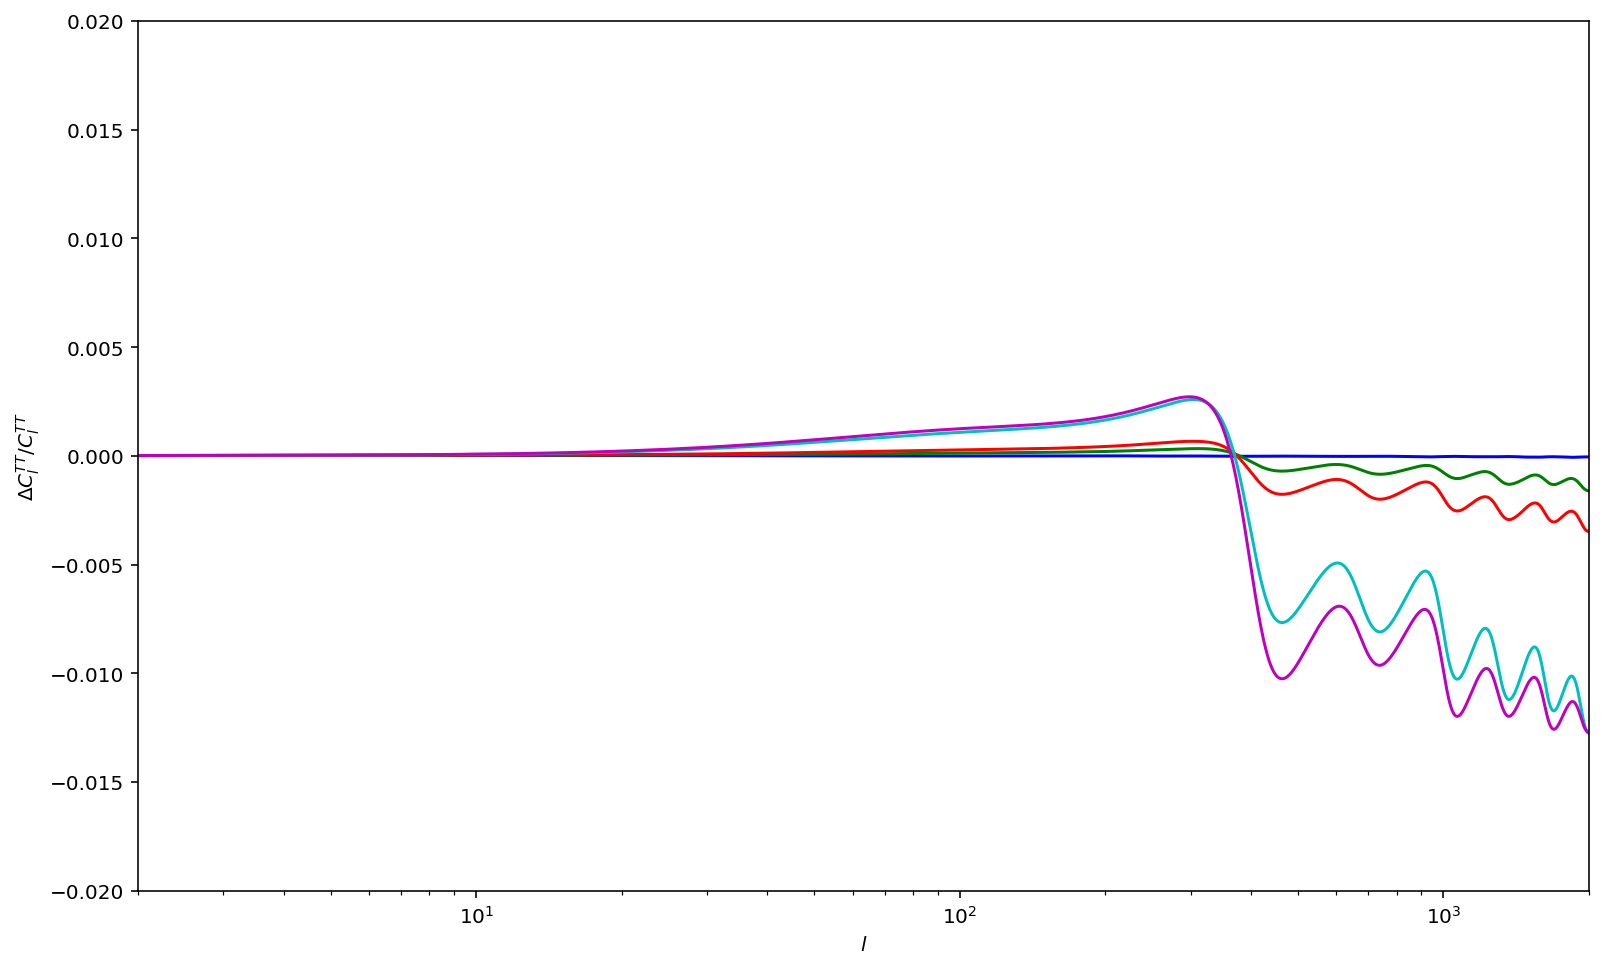

In [10]:
plt.figure(6)
plt.xscale('log');plt.yscale('linear');plt.xlim(2.,2.e3);plt.ylim(-0.0225,0.005)
plt.xlabel(r'$l$')
plt.ylabel(r'$\Delta C_l^{TT}/C_l^{TT}$')

plt.ylim(-0.02,0.02)

plt.plot(ll,TT2/TT -1.,'b-')
plt.plot(ll,TT0/TT -1.,'g-')
plt.plot(ll,TTm1/TT -1.,'r-')
plt.plot(ll,TTm2/TT -1.,'c-')
plt.plot(ll,TTm4/TT -1.,'m-')

plt.show()

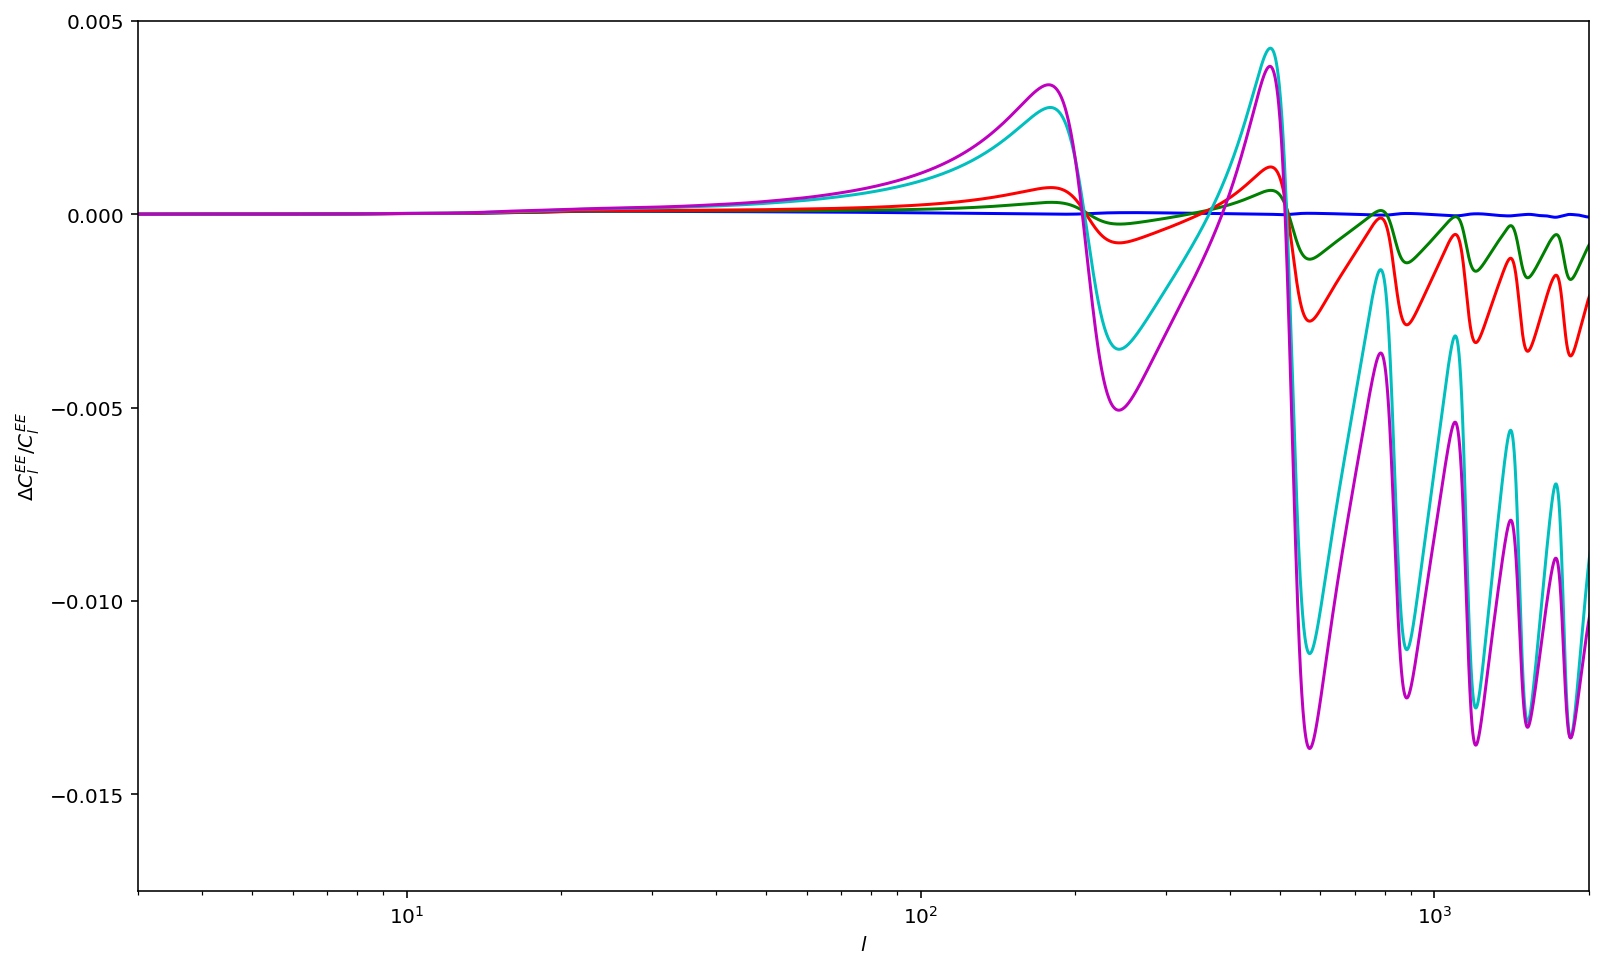

In [11]:
plt.figure(7)

plt.xscale('log');plt.yscale('linear');plt.xlim(3.,2.e3);plt.ylim(-0.0175,0.005)
# plt.xscale('log');plt.yscale('linear');plt.xlim(4.,5.e1);plt.ylim(-0.002,0.002)

plt.xlabel(r'$l$')
plt.ylabel(r'$\Delta C_l^{EE}/C_l^{EE}$')

# plt.plot(ll,EEor/EE -1.,'k-')
plt.plot(ll,EE2/EE -1.,'b-')
plt.plot(ll,EE0/EE -1.,'g-')
plt.plot(ll,EEm1/EE -1.,'r-')
plt.plot(ll,EEm2/EE -1.,'c-')
plt.plot(ll,EEm4/EE -1.,'m-')

plt.show()